In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
image_dir = Path(r'C:\Users\aweso\OneDrive - National Institute of Technology\NITT\Semesters\Sem 8\FYP\Project\BSR Using ResNet\DATA TLS\train_imag')

In [4]:
image_dir

WindowsPath('C:/Users/aweso/OneDrive - National Institute of Technology/NITT/Semesters/Sem 8/FYP/Project/BSR Using ResNet/DATA TLS/train_imag')

In [5]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

In [6]:
[os.path.abspath(filepaths[0]) for filepaths[0] in filepaths ]

['C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\\train_imag\\train_imag\\T0\\312Crown.jpg',
 'C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\\train_imag\\train_imag\\T0\\313Crown.jpg',
 'C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\\train_imag\\train_imag\\T0\\314Crown.jpg',
 'C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\\train_imag\\train_imag\\T0\\319Crown.jpg',
 'C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\\train_imag\\train_imag\\T0\\320Crown.jpg',
 'C:\\Users\\aweso\\OneDrive - National Institute of Technology\\NITT\\Semesters\\Sem 8\\FYP\\Project\\BSR Using ResNet\\DATA TLS\

In [7]:
images.Label.value_counts()

T0    6
T1    6
T2    6
T3    6
Name: Label, dtype: int64

In [8]:
images

,Filepath,Label
0,C:\Users\aweso\OneDrive - National Institute o...,T0
1,C:\Users\aweso\OneDrive - National Institute o...,T0
2,C:\Users\aweso\OneDrive - National Institute o...,T0
3,C:\Users\aweso\OneDrive - National Institute o...,T0
4,C:\Users\aweso\OneDrive - National Institute o...,T0
5,C:\Users\aweso\OneDrive - National Institute o...,T0
6,C:\Users\aweso\OneDrive - National Institute o...,T1
7,C:\Users\aweso\OneDrive - National Institute o...,T1
8,C:\Users\aweso\OneDrive - National Institute o...,T1
9,C:\Users\aweso\OneDrive - National Institute o...,T1


In [9]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=False
)

Found 13 validated image filenames belonging to 4 classes.
Found 3 validated image filenames belonging to 4 classes.
Found 8 validated image filenames belonging to 4 classes.


In [12]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

In [13]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(12, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(6, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2,restore_best_weights=True)
history = model.fit(train_images,validation_data=val_images,epochs=10,
    callbacks=[callbacks])

Epoch 1/10
4/4 [==============================] - 15s 2s/step - loss: 3.4601 - accuracy: 0.2308 - val_loss: 1.5527 - val_accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 2s 527ms/step - loss: 1.3741 - accuracy: 0.3077 - val_loss: 1.3247 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 2s 520ms/step - loss: 1.3420 - accuracy: 0.4615 - val_loss: 1.3643 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 2s 510ms/step - loss: 1.3251 - accuracy: 0.3846 - val_loss: 1.2930 - val_accuracy: 0.3333


In [16]:
results = model.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[1.393447756767273, 0.25]
Test Accuracy: 25.0%


In [17]:
predictions = np.argmax(model.predict(test_images), axis=1)
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

2/2 [==============================] - 3s 306ms/step


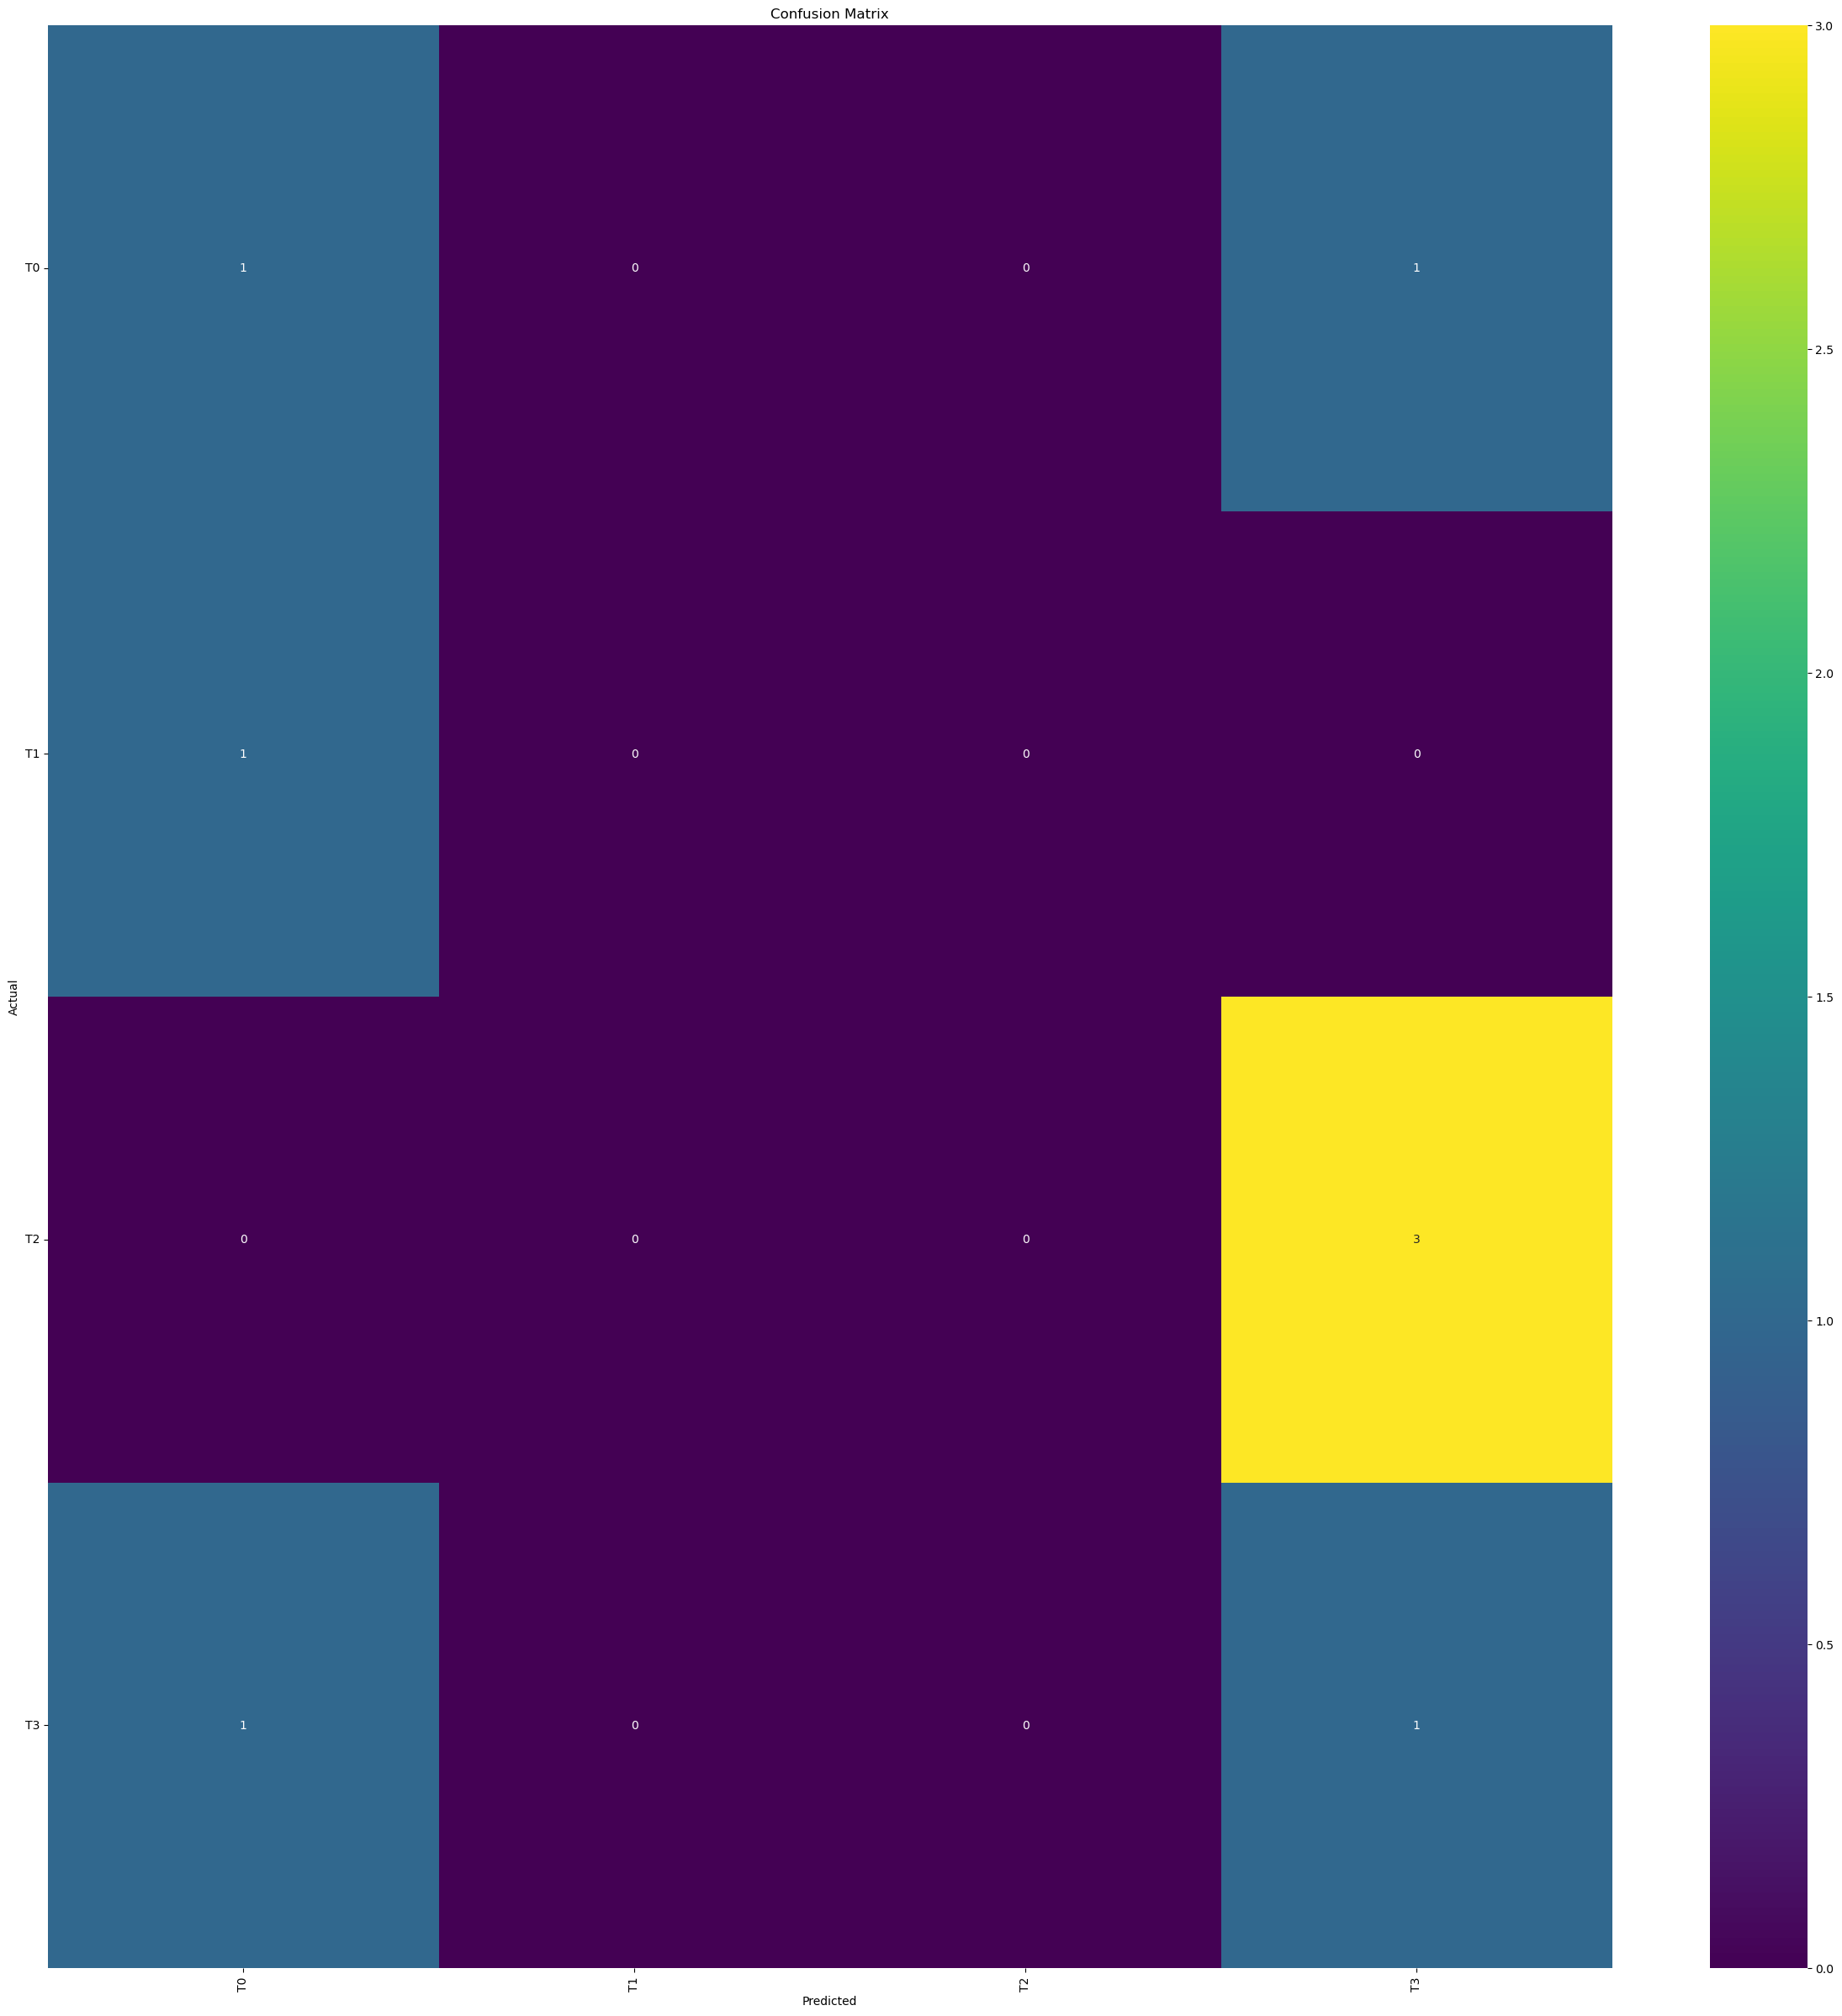

In [18]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix2",dpi=700)

In [19]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          T0       0.33      0.50      0.40         2
          T1       0.00      0.00      0.00         1
          T2       0.00      0.00      0.00         3
          T3       0.20      0.50      0.29         2

    accuracy                           0.25         8
   macro avg       0.13      0.25      0.17         8
weighted avg       0.13      0.25      0.17         8



In [20]:
data_his = pd.DataFrame(history.history)
data_his

,loss,accuracy,val_loss,val_accuracy
0,3.460097,0.230769,1.552655,0.333333
1,1.374124,0.307692,1.324695,0.666667
2,1.342037,0.461538,1.364257,0.666667
3,1.325120,0.384615,1.293007,0.333333


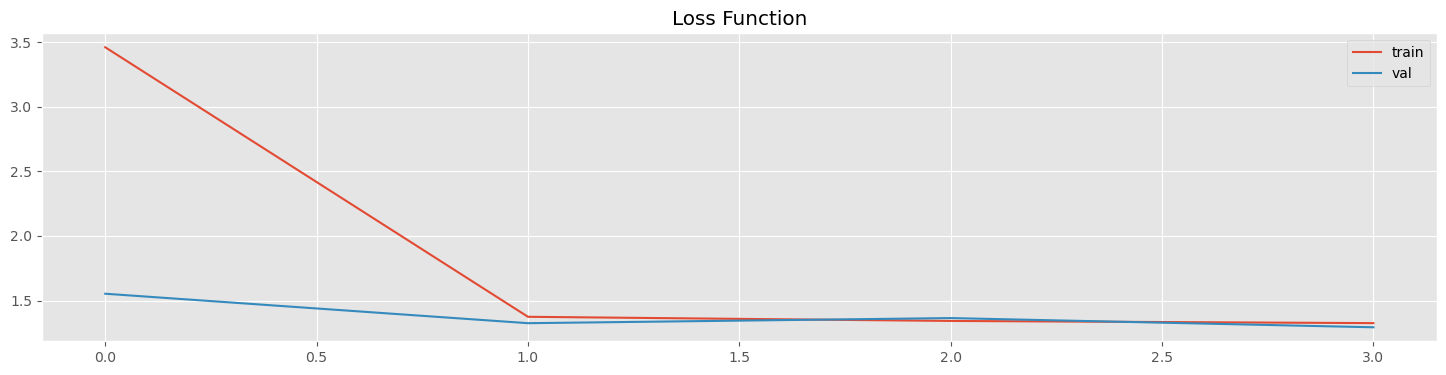

In [21]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function2",dpi=700)

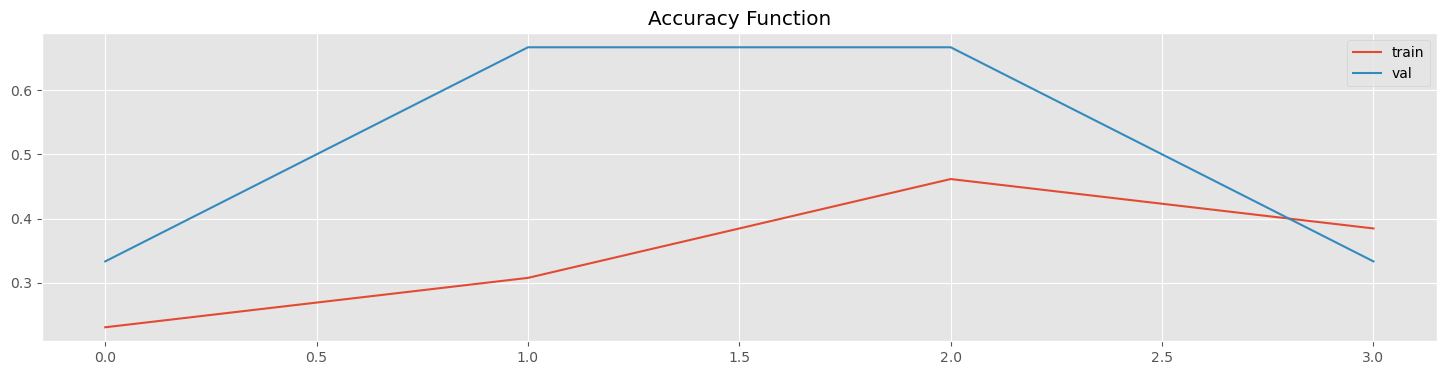

In [22]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function2",dpi=700)

In [23]:
train_images.class_indices.keys()

dict_keys(['T0', 'T1', 'T2', 'T3'])

In [24]:
train_images.class_indices.values()

dict_values([0, 1, 2, 3])

In [25]:
df=pd.DataFrame({'names':list(train_images.class_indices.keys()),
                 'index':list(train_images.class_indices.values())})

In [26]:
df.iloc[0]['names']

'T0'

In [32]:
from tensorflow.keras.preprocessing import image
# dir_path = 'C:/Users/aweso/Downloads/DATA TLS/test_imag'

# print(dir_path + '/')  # Verify the constructed path

dir_path = r'C:\Users\aweso\OneDrive - National Institute of Technology\NITT\Semesters\Sem 8\FYP\Project\BSR Using ResNet\DATA TLS\test_imag'

print(os.listdir(dir_path))  # Verify the folder contents

# for i in os.listdir(dir_path):
#     print(dir_path + '/' + i)  # Verify the constructed path

#     img = image.load_img(dir_path+'/'+i,target_size=(224,224))
    
#     #plt.imshow(img)
#     #plt.show()

['test_imag']


In [34]:
from tensorflow.keras.preprocessing import image
dir_path = '"C:\Users\aweso\OneDrive - National Institute of Technology\NITT\Semesters\Sem 8\FYP\Project\BSR Using ResNet\DATA TLS\testing\testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predictions = np.argmax(model.predict(images), axis=1)
    print(df.iloc[predictions]['names'])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/aweso/Downloads/DATA TLS/testing/testing'